In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
def brier_score(pred_prob, ytrue):
  return np.mean((pred_prob - ytrue)**2)

In [3]:
# Read in data and clean it up for testing (i.e. use season averages)
DATA_PATH = 'drive/MyDrive/march_madness_2023/march-machine-learning-mania-2023/'

df = pd.read_csv(DATA_PATH + 'Mfinal_data_2003-2022.csv')
to_drop = [col for col in df.columns if '14' in col]
df.drop(to_drop, axis=1, inplace=True)

print(df.shape)
df.head()

(2496, 19)


,Season,TeamIDA,TeamIDB,SeedA,SeedB,OffEffA,DefEffA,EFTA,WinRatioA,GapAvgA,AvgRankA,OffEffB,DefEffB,EFTB,WinRatioB,GapAvgB,AvgRankB,ScoreDiff,WinA
0,2003,1421,1411,16,16,105.315164,115.456256,0.489800,0.448276,-7.241379,259.2,107.187241,105.071425,0.503036,0.600000,1.966667,259.4,8,1
1,2003,1112,1436,1,16,115.232944,95.117513,0.517632,0.892857,14.964286,2.6,106.911164,99.247639,0.494732,0.655172,4.655172,159.6,29,1
2,2003,1113,1272,10,7,113.782349,103.406731,0.517334,0.620690,6.793103,33.6,109.889666,97.004974,0.498337,0.793103,8.689655,21.8,13,1
3,2003,1141,1166,11,6,114.122499,105.421379,0.572835,0.793103,6.103448,43.4,118.566346,96.739284,0.567455,0.878788,14.909091,23.0,6,1
4,2003,1143,1301,8,9,109.611481,102.725168,0.524098,0.724138,4.724138,36.2,111.669631,105.001178,0.534189,0.600000,4.400000,45.0,2,1


In [4]:
# Set up X and Y
to_drop = ['Season', 'TeamIDA', 'TeamIDB', 'ScoreDiff', 'WinA']
X = df.drop(to_drop, axis=1)
Y = df['WinA']

# Split into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Use standard scaler on features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
print('Training accuracy: {:.4f}'.format(model.score(X_train_scaled, Y_train)))
print('Testing accuracy: {:.4f}'.format(model.score(X_test_scaled, Y_test)))

train_prob = model.predict_proba(X_train_scaled)
test_prob = model.predict_proba(X_test_scaled)

print('Training Brier Score: {:.4f}'.format(brier_score(train_prob[:,0], Y_train)))
print('Testing Brier Score: {:.4f}'.format(brier_score(test_prob[:,0], Y_test)))

Training accuracy: 0.7172
Testing accuracy: 0.7036
Training Brier Score: 0.4404
Testing Brier Score: 0.4353


### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

100%|██████████| 500/500 [05:02<00:00,  1.65it/s]


<AxesSubplot:xlabel='k'>

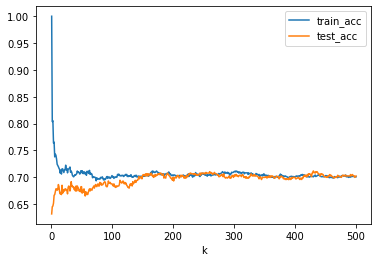

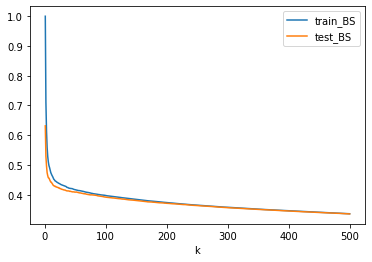

In [ ]:
k_min = 1
k_max = 500

k_list = []
train_acc = []
test_acc = []
train_BS = []
test_BS = []

for k in tqdm(np.arange(k_min, k_max+1)):
  k_list.append(k)
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled, Y_train)
  train_acc.append(model.score(X_train_scaled, Y_train))
  test_acc.append(model.score(X_test_scaled, Y_test))

  train_prob = model.predict_proba(X_train_scaled)
  test_prob = model.predict_proba(X_test_scaled)

  train_BS.append(brier_score(train_prob[:,0], Y_train))
  test_BS.append(brier_score(test_prob[:,0], Y_test))


errors = pd.DataFrame()
errors['k'] = k_list
errors['train_acc'] = train_acc
errors['test_acc'] = test_acc
errors['train_BS'] = train_BS
errors['test_BS'] = test_BS

errors.plot(x='k', y=['train_acc', 'test_acc'])
errors.plot(x='k', y=['train_BS', 'test_BS'])

In [ ]:
errors_KNN = errors.copy()

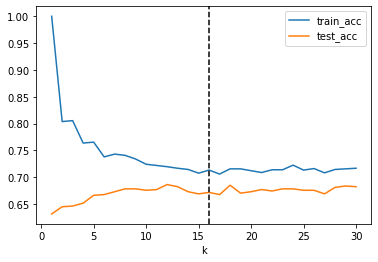

In [ ]:
errors_KNN[errors_KNN['k'] <= 30].plot(x='k', y=['train_acc', 'test_acc'])
plt.axvline(16, ls='dashed', c='k')

In [ ]:
errors_KNN[errors_KNN['k'] == 16]

,k,train_acc,test_acc,train_BS,test_BS
15,16,0.713223,0.671562,0.449789,0.429369


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

100%|██████████| 99/99 [01:03<00:00,  1.56it/s]


<AxesSubplot:xlabel='max_depth'>

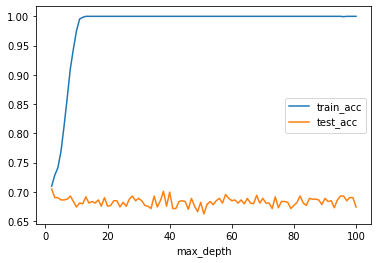

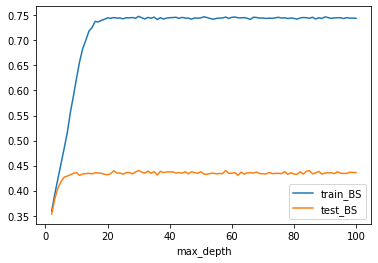

In [ ]:
max_depth_min = 2
max_depth_max = 100

max_depth_list = []
train_acc = []
test_acc = []
train_BS = []
test_BS = []

for m in tqdm(np.arange(max_depth_min, max_depth_max+1)):
  max_depth_list.append(m)
  model = RandomForestClassifier(max_depth=m)
  model.fit(X_train_scaled, Y_train)
  train_acc.append(model.score(X_train_scaled, Y_train))
  test_acc.append(model.score(X_test_scaled, Y_test))

  train_prob = model.predict_proba(X_train_scaled)
  test_prob = model.predict_proba(X_test_scaled)

  train_BS.append(brier_score(train_prob[:,0], Y_train))
  test_BS.append(brier_score(test_prob[:,0], Y_test))


errors = pd.DataFrame()
errors['max_depth'] = max_depth_list
errors['train_acc'] = train_acc
errors['test_acc'] = test_acc
errors['train_BS'] = train_BS
errors['test_BS'] = test_BS

errors.plot(x='max_depth', y=['train_acc', 'test_acc'])
errors.plot(x='max_depth', y=['train_BS', 'test_BS'])

In [ ]:
errors_RF = errors.copy()

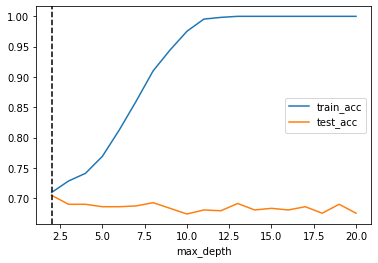

In [ ]:
errors_RF[errors_RF['max_depth'] <= 20].plot(x='max_depth', y=['train_acc', 'test_acc'])
plt.axvline(2, ls='dashed', c='k')

In [ ]:
errors_RF[errors_RF['max_depth'] == 2]

,max_depth,train_acc,test_acc,train_BS,test_BS
0,2,0.709788,0.70494,0.359178,0.353493


### Gradient tree boosting

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
parameters = {'max_depth':np.arange(2,10), 'learning_rate':10**np.linspace(-5,5, num=10)}

gbc = GradientBoostingClassifier()
model = GridSearchCV(gbc, parameters, n_jobs=8, verbose=3)
model.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


KeyboardInterrupt: ignored

In [ ]:
print('Training accuracy: {:.4f}'.format(model.score(X_train_scaled, Y_train)))
print('Testing accuracy: {:.4f}'.format(model.score(X_test_scaled, Y_test)))

train_prob = model.predict_proba(X_train_scaled)
test_prob = model.predict_proba(X_test_scaled)

print('Training Brier Score: {:.4f}'.format(brier_score(train_prob[:,0], Y_train)))
print('Testing Brier Score: {:.4f}'.format(brier_score(test_prob[:,0], Y_test)))